# WeatherPy

---

## This Script Generates Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated above

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url+city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] - 273.15 # Minus 273.15 to convert the temperature into Celsius
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | luanda
Processing Record 3 of Set 1 | sistranda
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | general roca
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | cam pha
City not found. Skipping...
Processing Record 8 of Set 1 | limbang
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | sinkat
City not found. Skipping...
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | norman wells
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | tura
Processing Record 15 of Set 1 | notse
Processing Record 16 of Set 1 | bima
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | corinto
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | qafsah
City not found. Skipping...
Processing Record 21 of

Processing Record 34 of Set 4 | boda
Processing Record 35 of Set 4 | tessalit
Processing Record 36 of Set 4 | egvekinot
Processing Record 37 of Set 4 | beringovskiy
Processing Record 38 of Set 4 | bambous virieux
Processing Record 39 of Set 4 | sitka
Processing Record 40 of Set 4 | new norfolk
Processing Record 41 of Set 4 | kasongo-lunda
Processing Record 42 of Set 4 | baringo
Processing Record 43 of Set 4 | rio grande
Processing Record 44 of Set 4 | brekstad
Processing Record 45 of Set 4 | sofiysk
City not found. Skipping...
Processing Record 46 of Set 4 | ikalamavony
Processing Record 47 of Set 4 | sfantu gheorghe
Processing Record 48 of Set 4 | sao joao da barra
Processing Record 49 of Set 4 | cockburn town
Processing Record 0 of Set 5 | hobyo
Processing Record 1 of Set 5 | kushmurun
Processing Record 2 of Set 5 | tigil
Processing Record 3 of Set 5 | aitape
Processing Record 4 of Set 5 | ponazyrevo
Processing Record 5 of Set 5 | ahipara
Processing Record 6 of Set 5 | narsaq
Process

Processing Record 25 of Set 8 | vardo
Processing Record 26 of Set 8 | vao
Processing Record 27 of Set 8 | manggar
Processing Record 28 of Set 8 | manokwari
Processing Record 29 of Set 8 | husavik
Processing Record 30 of Set 8 | gourcy
Processing Record 31 of Set 8 | nanchong
Processing Record 32 of Set 8 | mogadishu
Processing Record 33 of Set 8 | olga
Processing Record 34 of Set 8 | aswan
Processing Record 35 of Set 8 | mbandaka
Processing Record 36 of Set 8 | katobu
Processing Record 37 of Set 8 | itaiba
Processing Record 38 of Set 8 | bongandanga
Processing Record 39 of Set 8 | la ronge
Processing Record 40 of Set 8 | ucluelet
Processing Record 41 of Set 8 | afmadu
City not found. Skipping...
Processing Record 42 of Set 8 | bandarbeyla
Processing Record 43 of Set 8 | atar
Processing Record 44 of Set 8 | sandila
Processing Record 45 of Set 8 | kahama
Processing Record 46 of Set 8 | santa maria
Processing Record 47 of Set 8 | isangel
Processing Record 48 of Set 8 | fukue
Processing Re

Processing Record 9 of Set 12 | mananjary
Processing Record 10 of Set 12 | belmonte
Processing Record 11 of Set 12 | stephenville
Processing Record 12 of Set 12 | hilliard
Processing Record 13 of Set 12 | bonavista
Processing Record 14 of Set 12 | williams lake
Processing Record 15 of Set 12 | baoshan
Processing Record 16 of Set 12 | mora
Processing Record 17 of Set 12 | namioka
Processing Record 18 of Set 12 | renfrew
Processing Record 19 of Set 12 | arcachon
Processing Record 20 of Set 12 | wewak
Processing Record 21 of Set 12 | sabang
Processing Record 22 of Set 12 | dolores
Processing Record 23 of Set 12 | kuytun
Processing Record 24 of Set 12 | zolotinka
City not found. Skipping...
Processing Record 25 of Set 12 | naantali
Processing Record 26 of Set 12 | lermontovka
Processing Record 27 of Set 12 | qasigiannguit
Processing Record 28 of Set 12 | bubaque
Processing Record 29 of Set 12 | rincon de la victoria
Processing Record 30 of Set 12 | sampit
Processing Record 31 of Set 12 | m

In [39]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          539
Lat           539
Lng           539
Max Temp      539
Humidity      539
Cloudiness    539
Wind Speed    539
Country       539
Date          539
dtype: int64

In [40]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tuktoyaktuk,69.4541,-133.0374,-20.90,98,100,3.58,CA,1674041437
1,luanda,-8.8368,13.2343,30.00,70,75,1.54,AO,1674041899
2,sistranda,63.7256,8.8340,2.98,68,89,3.14,NO,1674041899
3,ushuaia,-54.8000,-68.3000,14.81,63,75,1.03,AR,1674041444
4,general roca,-39.0333,-67.5833,24.29,54,97,3.38,AR,1674041899


In [41]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [42]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tuktoyaktuk,69.4541,-133.0374,-20.90,98,100,3.58,CA,1674041437
1,luanda,-8.8368,13.2343,30.00,70,75,1.54,AO,1674041899
2,sistranda,63.7256,8.8340,2.98,68,89,3.14,NO,1674041899
3,ushuaia,-54.8000,-68.3000,14.81,63,75,1.03,AR,1674041444
4,general roca,-39.0333,-67.5833,24.29,54,97,3.38,AR,1674041899


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [43]:
# Function to convert timestamp into normal form of datetime and then extract and return the year, month and day as a list
def date_conv(time_stamp):
    date_run = time.localtime(time_stamp)
    date = [date_run.tm_year, date_run.tm_mon, date_run.tm_mday]
    return date

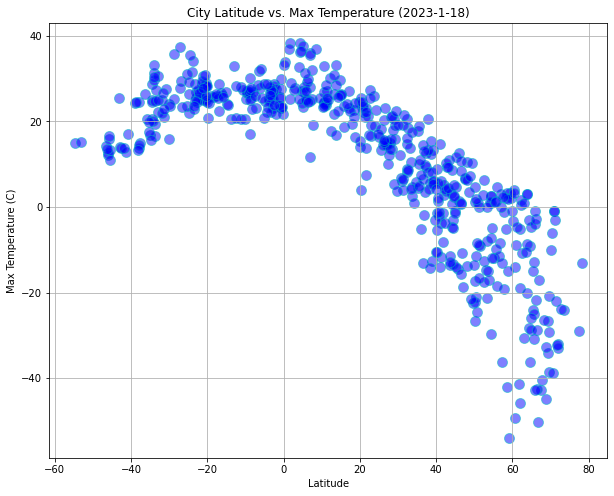

In [63]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.figure(figsize=(10, 8))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", s=100, alpha=0.5, color='c')

# Call function to convert the data retrieval date from timestamp into normal form of datetime
date = date_conv(city_data_df["Date"][0])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Latitude vs. Max Temperature ({date[0]}-{date[1]}-{date[2]})') # Print title with data retrieval date
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

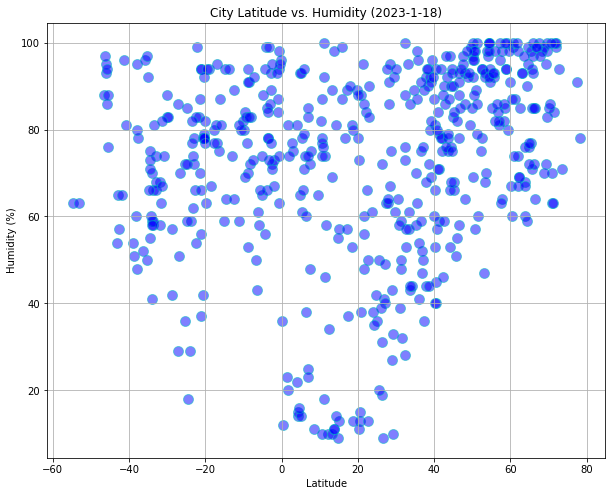

In [64]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.figure(figsize=(10, 8))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", s=100, alpha=0.5, color='c')

# Call function to convert the data retrieval date from timestamp into normal form of datetime
date = date_conv(city_data_df["Date"][0])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date[0]}-{date[1]}-{date[2]})') # Print title with data retrieval date
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

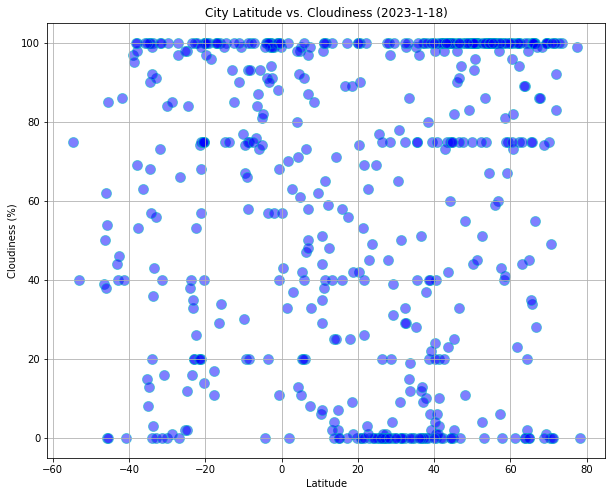

In [65]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.figure(figsize=(10, 8))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", s=100, alpha=0.5, color='c')

# Call function to convert the data retrieval date from timestamp into normal form of datetime
date = date_conv(city_data_df["Date"][0])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date[0]}-{date[1]}-{date[2]})') # Print title with data retrieval date
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

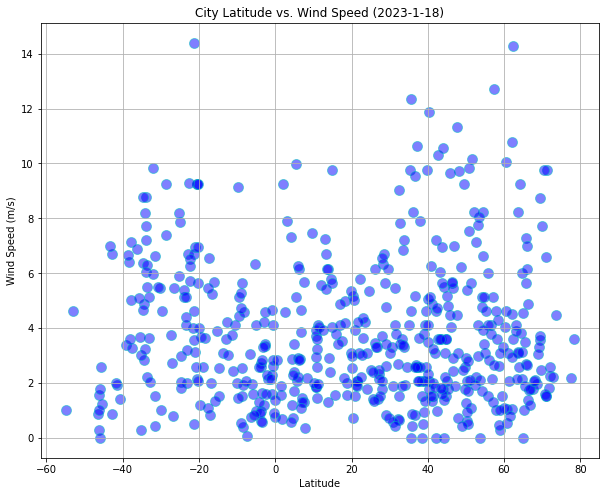

In [66]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.figure(figsize=(10, 8))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", s=100, alpha=0.5, color='c')

# Call function to convert the data retrieval date from timestamp into normal form of datetime
date = date_conv(city_data_df["Date"][0])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed ({date[0]}-{date[1]}-{date[2]})') # Print title with data retrieval date
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [67]:
# Function to create Linear Regression plots
def plot_lin_reg(x_values,y_values,xy):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.plot(x_values,regress_values,"r-")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    print(f"The r-value is: {rvalue}") # Print the r-value out

In [68]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tuktoyaktuk,69.4541,-133.0374,-20.90,98,100,3.58,CA,1674041437
2,sistranda,63.7256,8.8340,2.98,68,89,3.14,NO,1674041899
5,jamestown,42.0970,-79.2353,2.79,75,100,7.20,US,1674041480
6,limbang,4.7500,115.0000,27.06,93,98,0.74,MY,1674041900
9,norman wells,65.2820,-126.8329,-23.98,77,75,1.03,CA,1674041505


In [69]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,luanda,-8.8368,13.2343,30.00,70,75,1.54,AO,1674041899
3,ushuaia,-54.8000,-68.3000,14.81,63,75,1.03,AR,1674041444
4,general roca,-39.0333,-67.5833,24.29,54,97,3.38,AR,1674041899
7,cape town,-33.9258,18.4232,31.18,59,0,7.20,ZA,1674041436
8,lebu,-37.6167,-73.6500,14.84,78,53,3.28,CL,1674041489


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8538282696081269


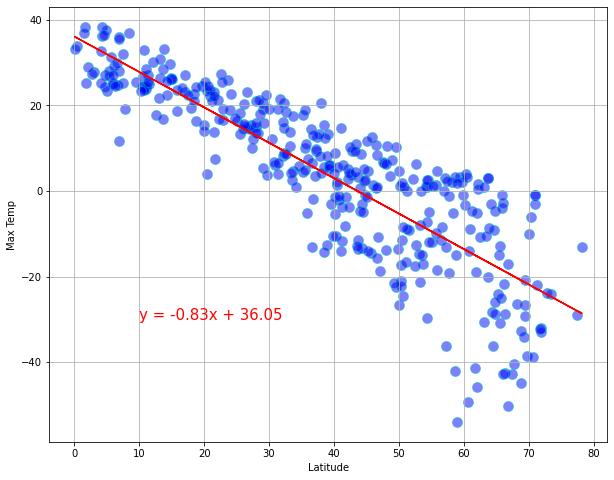

In [70]:
# Linear regression on Northern Hemisphere

# Plot latitude against max temperature for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.figure(figsize=(10, 8))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", s=100, alpha=0.5, color='c')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid()

# Plot the linear regression line, display its formula and print the r-value
plot_lin_reg(x_values,y_values,(10,-30))

The r-value is: 0.4683085104982048


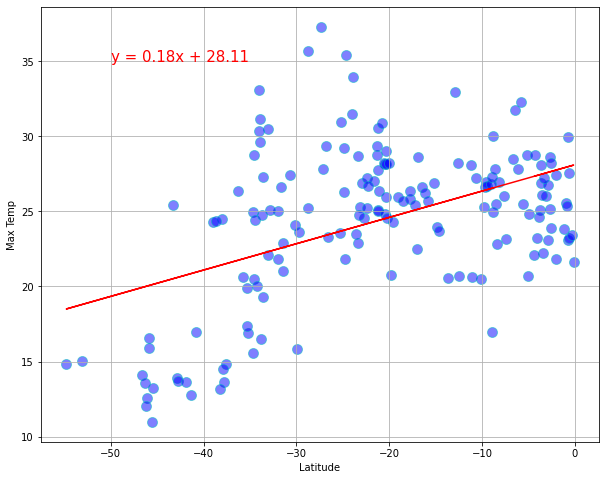

In [71]:
# Linear regression on Southern Hemisphere

# Plot latitude against max temperature for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.figure(figsize=(10, 8))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", s=100, alpha=0.5, color='c')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid()

# Plot the linear regression line, display its formula and print the r-value
plot_lin_reg(x_values,y_values,(-50,35))

**Discussion about the linear relationship:** In general, the nearer a city is to the equator, the higher its maximum temperature. There is a strong negative correlation between the latitude of a city and its maximum temperature in the northern hemisphere, as is evident by the r value of -0.85. But in the southern hemisphere, due to a r value of only 0.47, there is only a weak to moderate positive correlation between the latitude of a city and its maximum temperature. There are other significant factors at play that affect maximum temperature in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4931458610724432


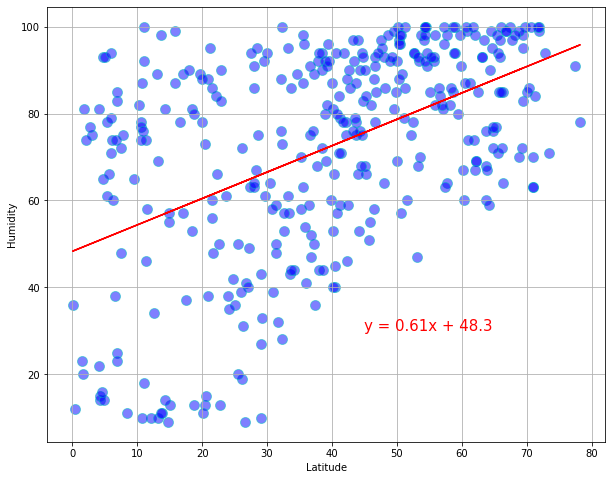

In [72]:
# Linear regression on Northern Hemisphere

# Plot latitude against humidity for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.figure(figsize=(10, 8))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", s=100, alpha=0.5, color='c')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

# Plot the linear regression line, display its formula and print the r-value
plot_lin_reg(x_values,y_values,(45,30))

The r-value is: 0.19666706208659332


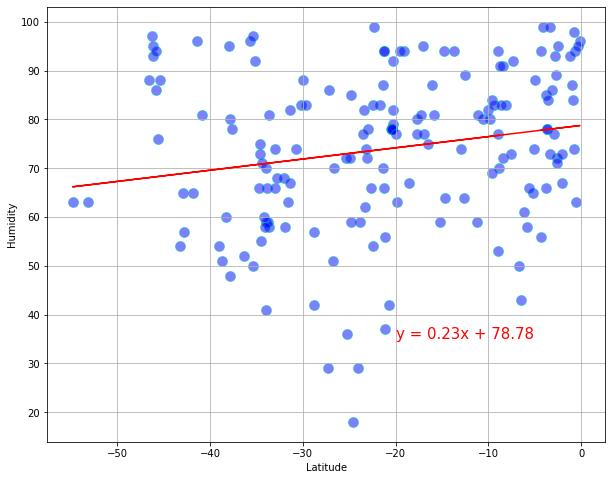

In [73]:
# Linear regression on Southern Hemisphere

# Plot latitude against humidity for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.figure(figsize=(10, 8))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", s=100, alpha=0.5, color='c')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

# Plot the linear regression line, display its formula and print the r-value
plot_lin_reg(x_values,y_values,(-20,35))

**Discussion about the linear relationship:** There is only a weak relationship between a city's latitude and its humidity. In the northern hemisphere, with a r value of 0.49, we can say that there is a weak to moderate positive correlation between latitude and humidity; the closer a city is to the equator, the lower the humidity. However, in the southern hemisphere, with a r value of 0.20, we can say that there is little to no correlation between latitude and humidity. There are other more significant factors at play that affect humidity, especially in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2625063050813504


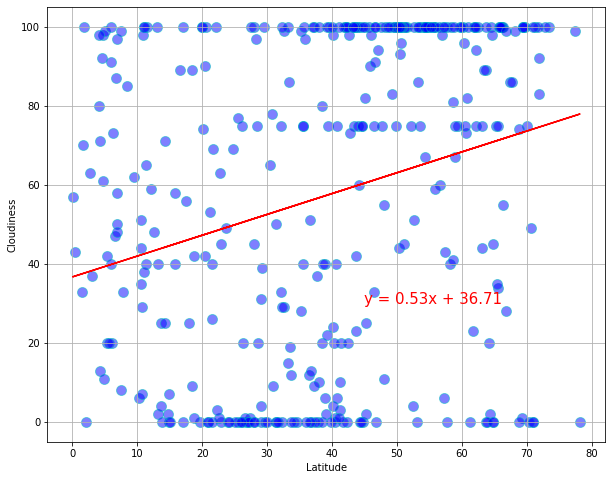

In [74]:
# Linear regression on Northern Hemisphere

# Plot latitude against cloudiness for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.figure(figsize=(10, 8))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", s=100, alpha=0.5, color='c')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

# Plot the linear regression line, display its formula and print the r-value
plot_lin_reg(x_values,y_values,(45,30))

The r-value is: 0.30184252446828286


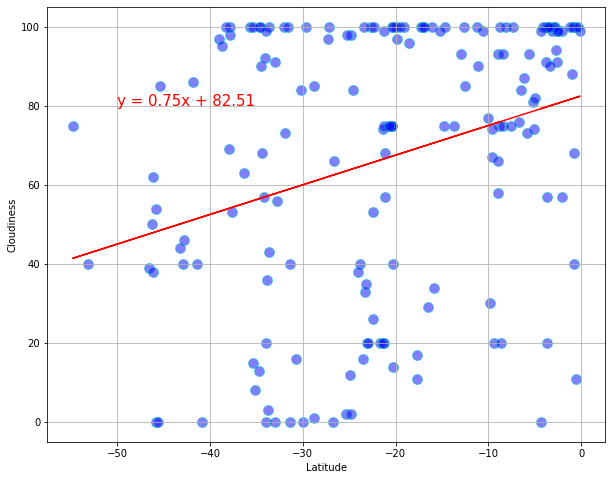

In [75]:
# Linear regression on Southern Hemisphere

# Plot latitude against cloudiness for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.figure(figsize=(10, 8))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", s=100, alpha=0.5, color='c')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

# Plot the linear regression line, display its formula and print the r-value
plot_lin_reg(x_values,y_values,(-50,80))

**Discussion about the linear relationship:** There is also only a weak relationship between a city's latitude and its cloudiness. In the northern hemisphere, with a r value of 0.26, we can say that there is a very weak correlation between latitude and cloudiness. In the southern hemisphere, with a r value of 0.30, we can say that there is at best only a weak correlation between latitude and cloudiness. As with humidity, there are other more significant factors at play that affect cloudiness in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05729801510300591


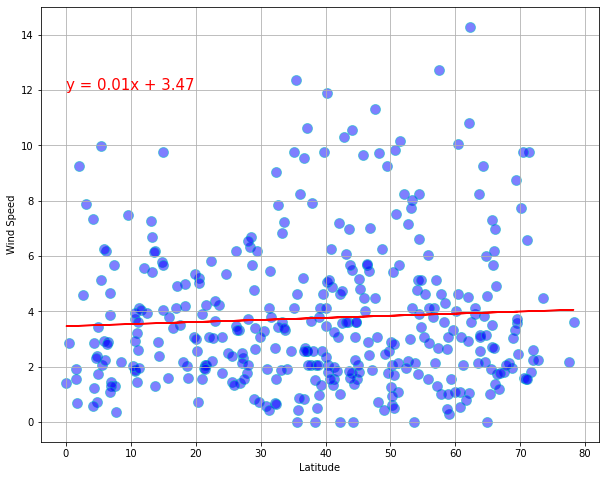

In [76]:
# Linear regression on Northern Hemisphere

# Plot latitude against wind speed for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.figure(figsize=(10, 8))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", s=100, alpha=0.5, color='c')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

# Plot the linear regression line, display its formula and print the r-value
plot_lin_reg(x_values,y_values,(0,12))

The r-value is: -0.2000027315218691


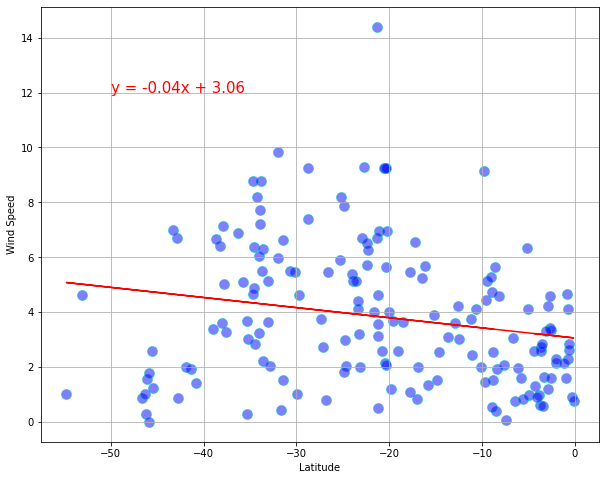

In [77]:
# Linear regression on Southern Hemisphere

# Plot latitude against wind speed for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.figure(figsize=(10, 8))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", s=100, alpha=0.5, color='c')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

# Plot the linear regression line, display its formula and print the r-value
plot_lin_reg(x_values,y_values,(-50,12))

**Discussion about the linear relationship:** There is little to no relationship between a city's latitude and its wind speed. In the northern hemisphere, with a r value of 0.06, we can say that there is no correlation between latitude and wind speed. Similarly, in the southern hemisphere, with a r value of -0.20, we can say that there is only at best a very weak negative correlation between latitude and wind speed. There are other much more significant factors at play that affect wind speed in both hemispheres.